In [1]:
import math
import numpy as np
import scipy as sp
from scipy.linalg import eig
from numpy import sin, cos, abs, exp, sqrt, arccos, pi

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
U = 0.0 # Kerr nonlinearity; units of gamma_T / |a|^2
gamma = 5e-2 # 5e-2 # Total loss rate 5e-2
J = 1.0 # Inter-cavity coupling
N = 500 # Number of cavities
F_value = 1.0 # Pump
Delta_list = np.linspace(-2, 2, 50) # Detuning
Delta_n = 2 # Inter-pump distance

In [3]:
def f_RK4(Delta, U, gamma, J, F, a):

    # Open boundary conditions
    a_l = np.concatenate((np.zeros(1), a[:-1]))
    a_r = np.concatenate((a[1:], np.zeros(1)))

    # Periodic boundary conditions
    #a_l = np.concatenate((np.ones(1)*a[-1], a[:-1]))
    #a_r = np.concatenate((a[1:], np.ones(1)*a[0]))

    y = -1.0j * (
        -Delta*a + U*abs(a)**2*a -1.0j*gamma*a - J*a_l - J*a_r + F
    )
    
    return y

N_t = 1e3 # Number of time steps
t_f = 1e2 # Final time
t = np.linspace(0, t_f, int(N_t))
Delta_t = t[1] - t[0]

In [4]:
# Cavity-laser coupling
ll_list = np.zeros(len(Delta_list), dtype=np.float64)
a_list = np.zeros(len(Delta_list), dtype=np.float64)
a_total_list = np.zeros(len(Delta_list), dtype=np.float64)

n1 = 249
F = np.zeros(N, dtype=np.complex128)
n2 = n1 + Delta_n
F[int(n1)] = F_value
F[int(n2)] = F_value

# Cavity fields
a = np.zeros((N, int(N_t)), dtype=np.complex128)

for i_Delta, Delta in enumerate(Delta_list):

    print('Delta = {:}'.format(Delta_list[i_Delta]))

    for i_t in range(len(t)-1):

        k1 = f_RK4(Delta, U, gamma, J, F, a[:, i_t])
        k2 = f_RK4(Delta, U, gamma, J, F, a[:, i_t] + k1*Delta_t/2)
        k3 = f_RK4(Delta, U, gamma, J, F, a[:, i_t] + k2*Delta_t/2)
        k4 = f_RK4(Delta, U, gamma, J, F, a[:, i_t] + k3*Delta_t)

        a[:, i_t+1] = a[:, i_t] + (k1 + 2*k2 + 2*k3 + k4)*Delta_t/6

    a[:, 0] = a[:, -1]

    # We define a parameter characterizing the light localization
    ll_list[i_Delta] = np.sum(np.abs(a[249+1:249+Delta_n, -1])**2) / np.sum(np.abs(a[:, -1])**2) 
    a_list [i_Delta] = np.sum(np.abs(a[249+1:249+Delta_n, -1])**2) 
    a_total_list[i_Delta] = np.sum(np.abs(a[:, -1])**2) 

Delta = -2.0
Delta = -1.9183673469387754
Delta = -1.836734693877551
Delta = -1.7551020408163265
Delta = -1.6734693877551021
Delta = -1.5918367346938775
Delta = -1.510204081632653
Delta = -1.4285714285714286
Delta = -1.3469387755102042
Delta = -1.2653061224489797
Delta = -1.183673469387755
Delta = -1.1020408163265307
Delta = -1.0204081632653061
Delta = -0.9387755102040818
Delta = -0.8571428571428572
Delta = -0.7755102040816328
Delta = -0.6938775510204083
Delta = -0.6122448979591837
Delta = -0.5306122448979593
Delta = -0.44897959183673475
Delta = -0.3673469387755104
Delta = -0.2857142857142858
Delta = -0.20408163265306145
Delta = -0.12244897959183687
Delta = -0.04081632653061229
Delta = 0.04081632653061229
Delta = 0.12244897959183643
Delta = 0.204081632653061
Delta = 0.2857142857142856
Delta = 0.36734693877551017
Delta = 0.4489795918367343
Delta = 0.5306122448979589
Delta = 0.6122448979591835
Delta = 0.693877551020408
Delta = 0.7755102040816326
Delta = 0.8571428571428568
Delta = 0.938775

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20972\871557028.py:30: RuntimeWarning: divide by zero encountered in true_divide
  D = 1/sqrt(4*J**2-Delta_list**2)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20972\871557028.py:39: RuntimeWarning: invalid value encountered in double_scalars
  a_n_2_inside = 2*abs(F_value)**2*D_i**2*exp(-gamma*D_i*Delta_n)*(np.cosh(gamma*D_i*(n2+n1-2*n_list)) + cos(k0_i*(n2+n1-2*n_list)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20972\871557028.py:39: RuntimeWarning: invalid value encountered in multiply
  a_n_2_inside = 2*abs(F_value)**2*D_i**2*exp(-gamma*D_i*Delta_n)*(np.cosh(gamma*D_i*(n2+n1-2*n_list)) + cos(k0_i*(n2+n1-2*n_list)))


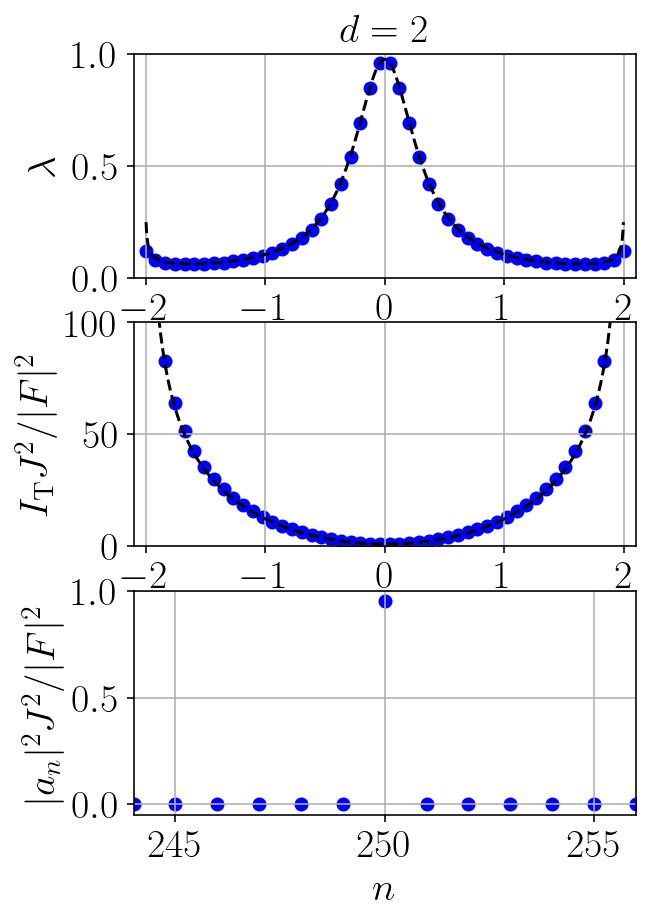

In [5]:
plt.rcParams["figure.figsize"] = [4.5, 7]
fig, ax = plt.subplots(3, 1)
fs = 20
ax[0].grid()
ax[1].grid()

Delta_list = np.linspace(-2, 2, 50)

ax[0].scatter(Delta_list, ll_list, color='blue')
ax[1].scatter(Delta_list, a_total_list, color='blue')

#ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel(r'$\Delta/J$', fontsize=fs)
ax[0].set_ylabel(r'$\lambda$', fontsize=fs)
ax[0].tick_params(axis='both', labelsize=fs)

ax[0].set_xlim(-2.1, 2.1)
ax[0].set_ylim(0, 1.0)

#ax[1].set_ylim([0.0, 1.5])
ax[1].set_xlabel(r'$\Delta/J$', fontsize=fs)
ax[1].set_ylabel(r'$I_{\rm T} J^2/|F|^2$', fontsize=fs)
ax[1].tick_params(axis='both', labelsize=fs)

ax[1].set_xlim(-2.1, 2.1)
ax[1].set_ylim(0, 100)

Delta_list = np.linspace(-2, 2, 1000)
k0 = arccos(-Delta_list/(2*J))
D = 1/sqrt(4*J**2-Delta_list**2)
d = Delta_n
integral = 2*np.abs(F_value)**2*D/gamma*(1+cos(k0*d)*exp(-gamma*D*d))
ax[1].plot(Delta_list, integral, '--k')

# From analytic formula
n_list = np.linspace(0, N-1, N)
a_n_2_sum = []
for D_i, k0_i in zip(D, k0):
    a_n_2_inside = 2*abs(F_value)**2*D_i**2*exp(-gamma*D_i*Delta_n)*(np.cosh(gamma*D_i*(n2+n1-2*n_list)) + cos(k0_i*(n2+n1-2*n_list)))
    a_n_2_sum.append(sum(a_n_2_inside[n1+1:n2]))
lambda_ana = np.array(a_n_2_sum) / integral
ax[0].plot(Delta_list, lambda_ana, '--k')

ax[0].set_title('$d = {:}$'.format(Delta_n), fontsize=fs)

ax[0].set_xticks(np.arange(-2, 3, 1))
ax[1].set_xticks(np.arange(-2, 3, 1))

##################################################################################


g = 0.0 # Kerr nonlinearity; units of gamma_T / |a|^2
gamma = 5e-2 # Total loss rate 5e-2
t_c = 1.0 # Inter-cavity coupling
N_c = 500 # Number of cavities
n1 = 249

Delta_l = 0.0 # Laser detuning w.r.t. cavity resonance frequency; units of gamma_T

# Cavity-laser coupling
t_l = np.zeros(N_c)
t_l[n1] = 1.0
t_l[n1+Delta_n] = 1.0

N_t = 1e4 # Number of time steps
t_f = 1e3 # Final time; units of 1/gamma_T
t = np.linspace(0, t_f, int(N_t))
Delta_t = t[1] - t[0]

# Cavity fields
a = np.zeros((N_c, int(N_t)), dtype=np.complex128)

# RK parameters
k1 = np.zeros(N_c)
k2 = np.zeros(N_c)
k3 = np.zeros(N_c)
k4 = np.zeros(N_c)

def f_RK4(Delta_l, g, gamma, t_c, t_l, a):

    a_l = np.concatenate((np.zeros(1), a[:-1]))
    a_r = np.concatenate((a[1:], np.zeros(1)))

    y = -1.0j * (
        -Delta_l*a + g*abs(a)**2*a -1.0j*gamma*a - t_c*a_l - t_c*a_r + t_l
    )
    
    return y

for i_t in range(len(t)-1):

    k1 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t])
    k2 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k1*Delta_t/2)
    k3 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k2*Delta_t/2)
    k4 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k3*Delta_t)

    a[:, i_t+1] = a[:, i_t] + (k1 + 2*k2 + 2*k3 + k4)*Delta_t/6

ax[2].scatter(np.linspace(0, N_c-1, N_c), abs(a[:, -1])**2, color='blue', label=r'$\Delta={:.1f}$'.format(Delta_l))

ax[2].set_xlim([int(n1-5), int(n1+Delta_n+5)])
ax[2].set_ylim(-0.05, 1)
ax[2].set_yticks(np.arange(0, 1.5, 0.5))
ax[2].set_xlabel(r'$n$',fontsize=fs)
ax[2].set_ylabel(r'$|a_n|^2 J^2/|F|^2$',fontsize=fs)
ax[2].tick_params(axis='both', labelsize=fs)
ax[2].grid()